# Hotel Booking Analysis
# Project Overview:
# Visualize cancellation rates and understand how factors like high prices, booking channels, and seasonal demand impact guest behavior.

Business Problem

In recent years, City Hotel and Resort Hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues as a result, 
including fewer revenues and less than ideal hotel room use. 
Consequently, lowering cancellation rates is both hotels' primary goal in order to increase their efficiency in generating revenue, 
and for us to offer thorough business advice to address this problem.

The analysis of hotel booking cancellations as well as other factors that have no bearing on their business and yearly revenue generation 
are the main topics of this report.


Assumptions

No unusual occurrences between 2015 and 2017 will have a substantial impact on the data used.
The information is still current and can be used to analyze a hotel's possible plans in an efficient manner.
There are no unanticipated negatives to the hotel employing any advised technique.
The hotels are not currently using any of the suggested solutions.
The biggest factor affecting the effectiveness of earning income is booking cancellations.
Cncellations result in vacant rooms for the booked length of time.
Clients make hotel reservations the same year they make cancellations.

Research Question

1. What are the variables that affect hotel reservation cancellations?
2. How can we make hotel reservations cancellations better?
3. How will hotels be assisted in making pricing and promotional decisions?

Hypothesis

1. More cancellations occur when prices are higher.
2. When there is a longer waiting list, customers tend to cancel more frequently.
3. The majority of clients are coming from offline travel agents to make their reservations.

# Importing Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [8]:
df=pd.read_csv("C:/Users/Hairav/Downloads/hotel_bookings 2.csv")

# Exploratory Data Analysis and Data Cleaning

In [10]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [11]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [12]:
df.shape

(119390, 32)

In [13]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [20]:
df["reservation_status_date"]= pd.to_datetime(df["reservation_status_date"],format="%d/%m/%Y")

In [27]:
df.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [33]:
for col in df.describe(include="object"):
    print(col)
    print(df[col].unique())
    print("-"*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [35]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [36]:
df.drop(["company","agent"],axis=1,inplace =True)                        

In [38]:
df.dropna(inplace=True)

In [39]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [47]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


In [ ]:
# Remove outliers

In [45]:
df=df[df["adr"]<5000]

In [46]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Data Analysis and Visualizations

# Cancellation rate %

In [49]:
df["is_canceled"].value_counts()

is_canceled
0    74745
1    44152
Name: count, dtype: int64

In [51]:
df["is_canceled"].sum()

44152

In [163]:
(df["is_canceled"].sum())*100/df["is_canceled"].count()

37.134662775343365

In [56]:
cancelled_perc = df["is_canceled"].value_counts(normalize= True)

In [57]:
cancelled_perc

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64

<BarContainer object of 2 artists>

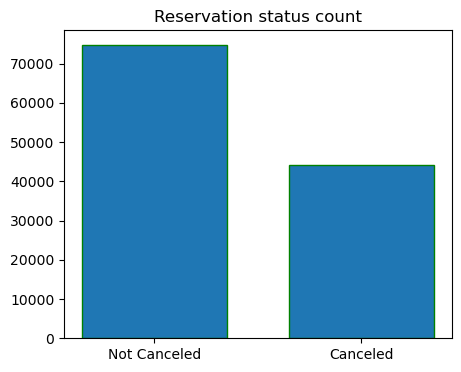

In [65]:
plt.figure(figsize=(5,4))
plt.title("Reservation status count")
plt.bar(["Not Canceled","Canceled"],df["is_canceled"].value_counts(),edgecolor="g",width=0.7)

The accompanying bar graph shows the percentage of reservation that are canceled and those are not. It is obvious that there are still a significant
number of reservations that have not been canceled. There are still 37% of clients who canceled their reservation, which has a significant 
impact on the hotels' earning.


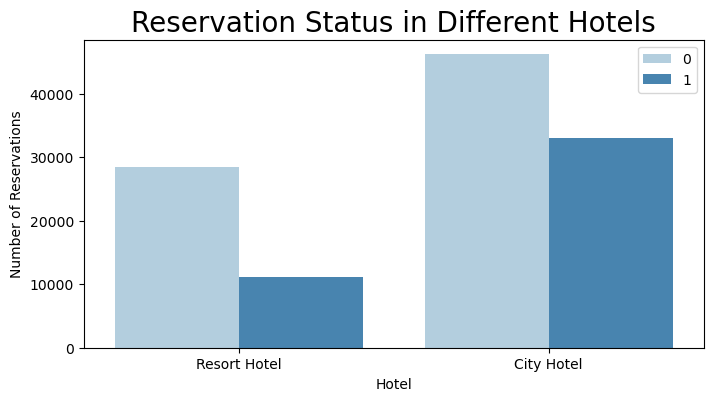

In comparison to resort hotels,city hotels have more bookings. It's possible that resort hotels are more expensive than those in cities

# Hotel wise cancellation percentage

In [77]:
resort_hotel=df[df["hotel"]=="Resort Hotel"]

In [79]:
resort_hotel["is_canceled"].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [82]:
resort_hotel["hotel"].count()

39596

In [87]:
print("Resort Hotel Cancellation % : ", (resort_hotel["is_canceled"].sum())*100/resort_hotel["hotel"].count())

Resort Hotel Cancellation % :  27.975047984644913


In [89]:
city_hotel= df[df["hotel"]=="City Hotel"]

In [91]:
city_hotel["hotel"].count()

79301

In [93]:
print("City Hotel Cancellation % : ", (city_hotel["is_canceled"].sum())*100/city_hotel["hotel"].count())

City Hotel Cancellation % :  41.70817518064085


In [96]:
city_hotel["is_canceled"].value_counts(normalize=True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [102]:
resort_hotel=resort_hotel.groupby("reservation_status_date")[["adr"]].mean()
city_hotel=city_hotel.groupby("reservation_status_date")[["adr"]].mean()

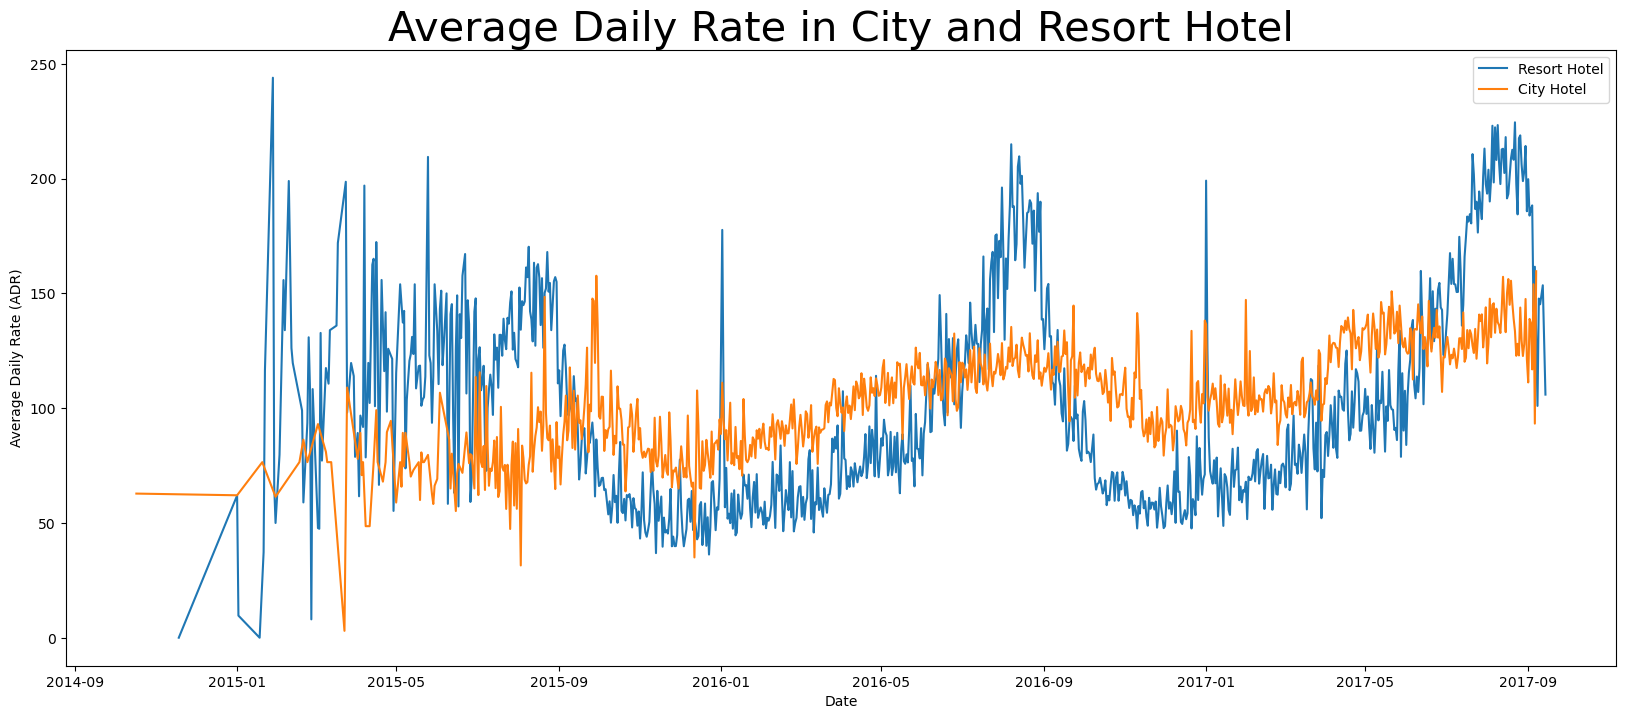

In [110]:
plt.figure(figsize=(20, 8))
plt.title("Average Daily Rate in City and Resort Hotel", fontsize=30)
plt.plot(resort_hotel.index, resort_hotel["adr"], label="Resort Hotel")
plt.plot(city_hotel.index, city_hotel["adr"], label="City Hotel")
plt.xlabel("Date")
plt.ylabel("Average Daily Rate (ADR)")
plt.legend() 
plt.show()

# Reservation Status Per Month

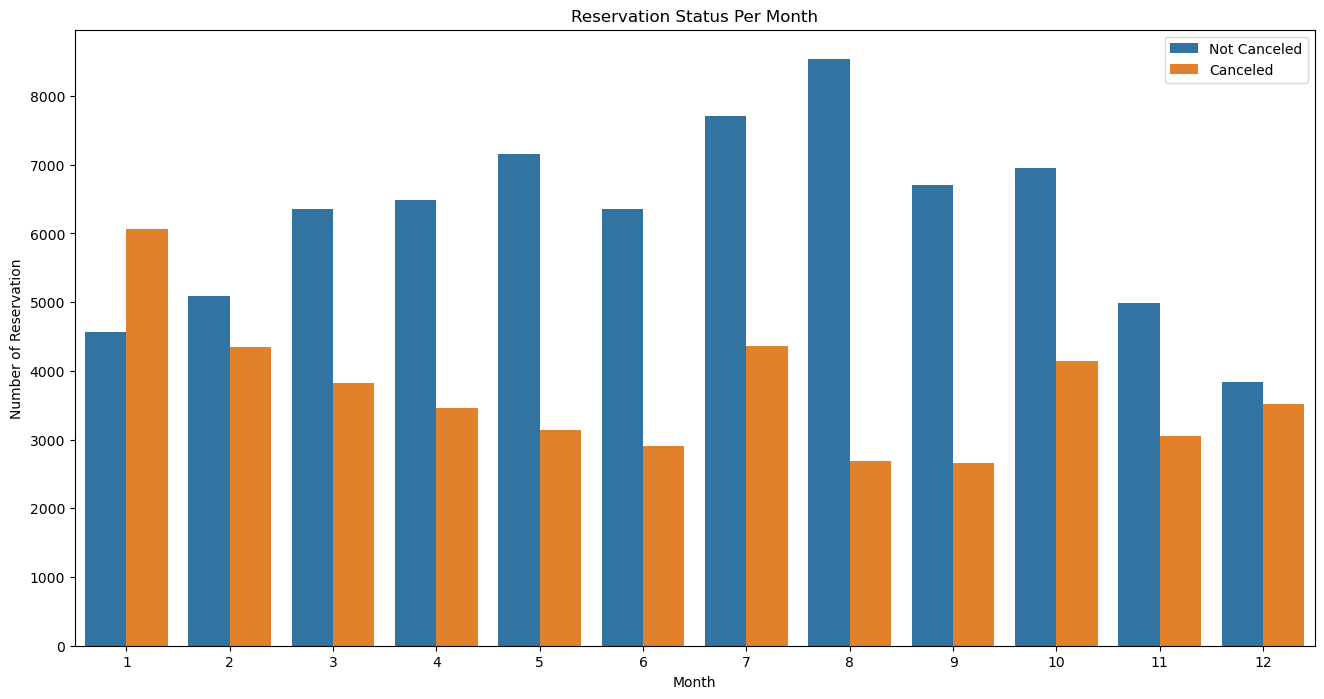

In [124]:
df["month"]=df["reservation_status_date"].dt.month
plt.figure(figsize=(16,8))
ax=sns.countplot(x="month",hue="is_canceled",data=df)
plt.title("Reservation Status Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Reservation")
plt.legend(["Not Canceled","Canceled"])
plt.show()

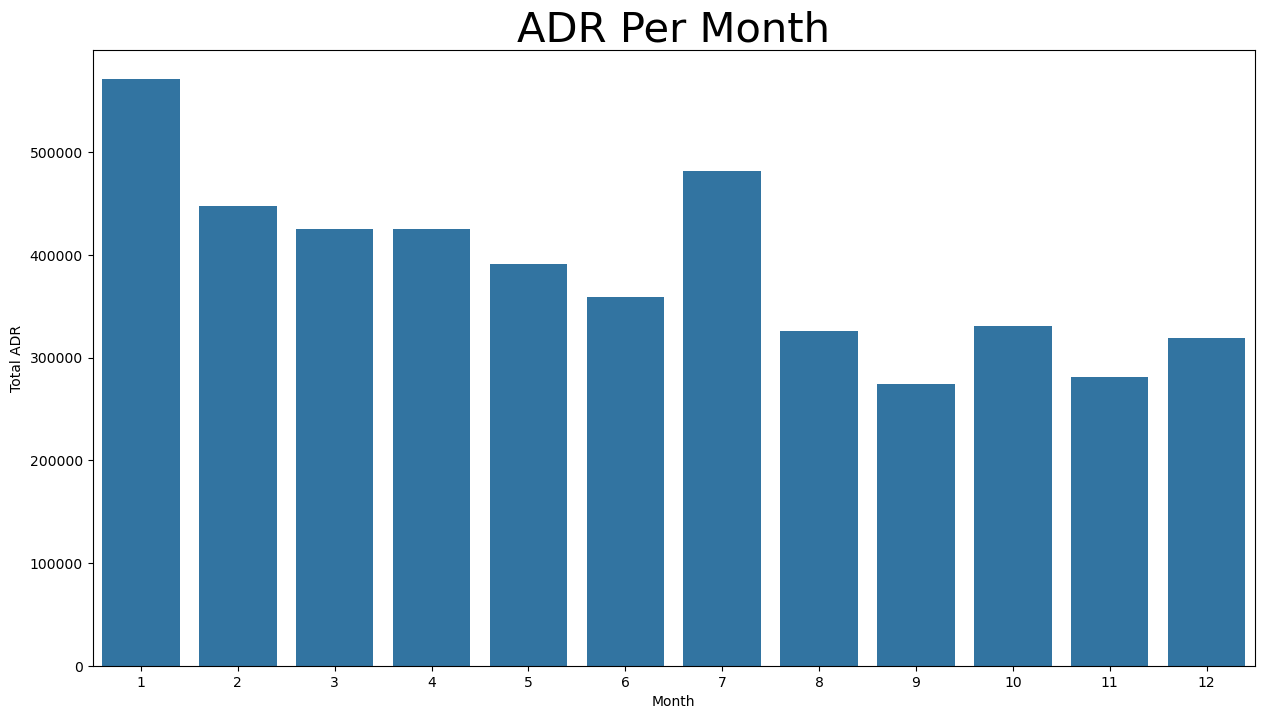

In [131]:
plt.figure(figsize=(15, 8))
plt.title("ADR Per Month", fontsize=30)
sns.barplot(x="month", y="adr", data=df[df["is_canceled"] == 1].groupby("month")[["adr"]].sum().reset_index())
plt.xlabel("Month")
plt.ylabel("Total ADR")
plt.show()

This bar graph demonstrates that cancellations are most common when prices are greatest and are least common when they are lowest
Therefore, the cost of the accomodation is solely responsible for the cancellation.

# Country Wise Cancellation Rate

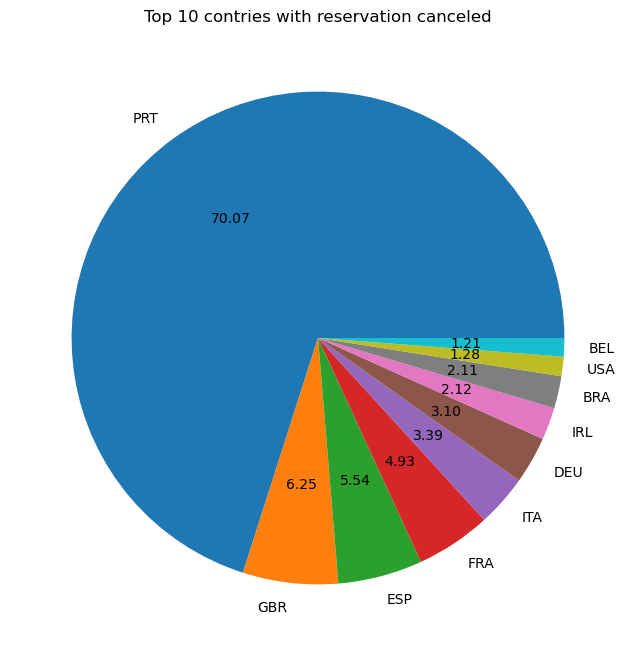

In [146]:
cancelled_data=df[df["is_canceled"]==1]
top_10_country=cancelled_data["country"].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title("Top 10 contries with reservation canceled")
plt.pie(top_10_country,autopct="%.2f",labels=top_10_country.index)
plt.show()

The top country is Portugal with the highest number of cancellations.

In [150]:
df["market_segment"].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [151]:
df["market_segment"].value_counts(normalize=True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

Around 46% of the clients come from online travel agencies, whereas 27% come from groups. Only 4% of clients book hotels directly by visiting them and
making reservations.

In [153]:
cancelled_data["market_segment"].value_counts(normalize=True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

# Canceled ADR Value

In [158]:
canceled_value=df[df["is_canceled"]==1]

In [160]:
canceled_value["adr"].mean()

104.91798536872624

# Non Canceled ADR Value

In [161]:
Non_canceled_value=df[df["is_canceled"]==0]

In [162]:
Non_canceled_value["adr"].mean()

100.21061796775702

# As seen, reservations are cancelled when the average daily rate is higher than when it is not cancelled. It is clearly proves all the above analysis, that the higher price leads to higher cancellation.

# Suggestions
1. Cancellation rates rise as the price does. In order to prevent cancellations of reservationsm hotels could work on their pricing strategies 
and try to lower the rates for specific hotels based on locations. They can also provide some discounts to the consumers.
2. As the ratio of the cancellation and not cancellation of the resort hotel is higher in the resort hotel than the city hotels. So the hotels should 
provide a reasonable discount on the room prices on weekends or on holidays.
3. In the month of january, hotels can start campaigns or marketing with a reasonable amount to increase their revenue as the cancellation is highest in
this month.
4. They can also increase the quality of their hotels and their services mainly in Portugal to reduce the cancellation rate.